This notebook aggregates the load temperature data sets taken for the paper.

In [3]:
import os

In [4]:
data_directory_1 = '/Users/daniel/Johnson+Miller/KIDs/SKIP/STAR Cryo Version 0/2014-07-11_tau_qp_load'
data_directory_2 = '/Users/daniel/Johnson+Miller/KIDs/SKIP/STAR Cryo Version 0/2014-07-21_tau_qp_load'

In [6]:
T_load_1 = np.load(os.path.join(data_directory_1, 'T_load.npy'))
pulse_tau_1 = np.load(os.path.join(data_directory_1, 'pulse_tau.npy'))
pulse_tau_error_1 = np.load(os.path.join(data_directory_1, 'pulse_tau_error.npy'))
spike_tau_1 = np.load(os.path.join(data_directory_1, 'spike_tau.npy'))
spike_tau_error_1 = np.load(os.path.join(data_directory_1, 'spike_tau_error.npy'))
T_load_2 = np.load(os.path.join(data_directory_2, 'T_load.npy'))
pulse_tau_2 = np.load(os.path.join(data_directory_2, 'pulse_tau.npy'))
pulse_tau_error_2 = np.load(os.path.join(data_directory_2, 'pulse_tau_error.npy'))
spike_tau_2 = np.load(os.path.join(data_directory_2, 'spike_tau.npy'))
spike_tau_error_2 = np.load(os.path.join(data_directory_2, 'spike_tau_error.npy'))
delta_tau_2 = np.load(os.path.join(data_directory_2, 'delta_tau.npy'))
delta_tau_error_2 = np.load(os.path.join(data_directory_2, 'delta_tau_error.npy'))

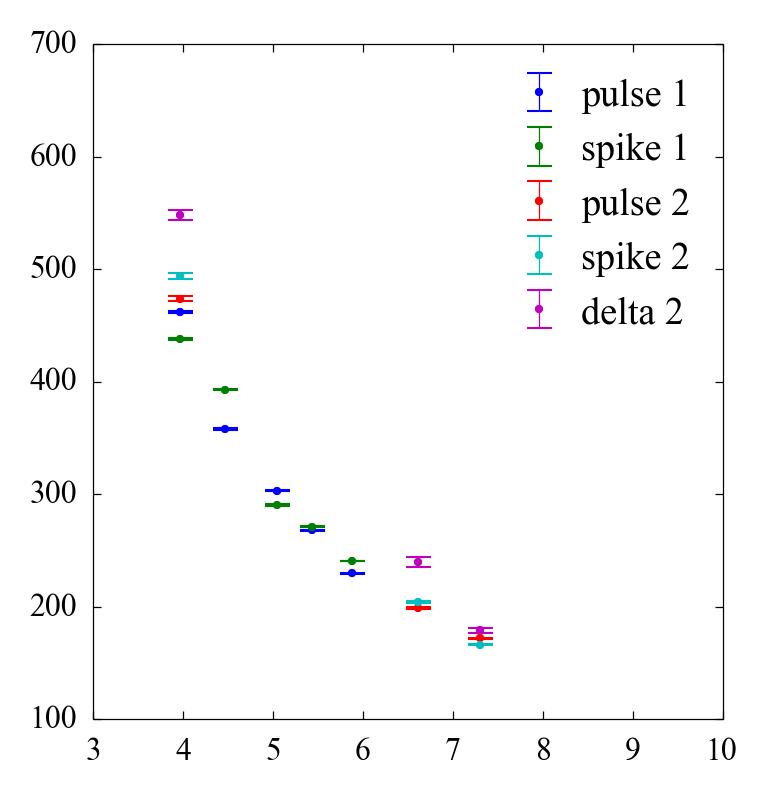

In [21]:
fig, ax = plt.subplots()
ax.errorbar(T_load_1, pulse_tau_1, yerr=pulse_tau_error_1, fmt='.', label='pulse 1')
ax.errorbar(T_load_1, spike_tau_1, yerr=spike_tau_error_1, fmt='.', label='spike 1')
ax.errorbar(T_load_2, pulse_tau_2, yerr=pulse_tau_error_2, fmt='.', label='pulse 2')
ax.errorbar(T_load_2, spike_tau_2, yerr=spike_tau_error_2, fmt='.', label='spike 2')
ax.errorbar(T_load_2, delta_tau_2, yerr=delta_tau_error_2, fmt='.', label='delta 2')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(3, 10)
ax.set_ylim(1e2, 7e2)
ax.legend(loc='best')

Note that the second pulse and spike points are higher than the first. Arbitrarily choose the first one.

In [18]:
T_load = np.concatenate((T_load_1, T_load_2[1:]))
pulse_tau = np.concatenate((pulse_tau_1, pulse_tau_2[1:]))
spike_tau = np.concatenate((spike_tau_1, spike_tau_2[1:]))
tau = (pulse_tau + spike_tau) / 2
tau_error = np.abs(pulse_tau - spike_tau) / 2

<Container object of 3 artists>

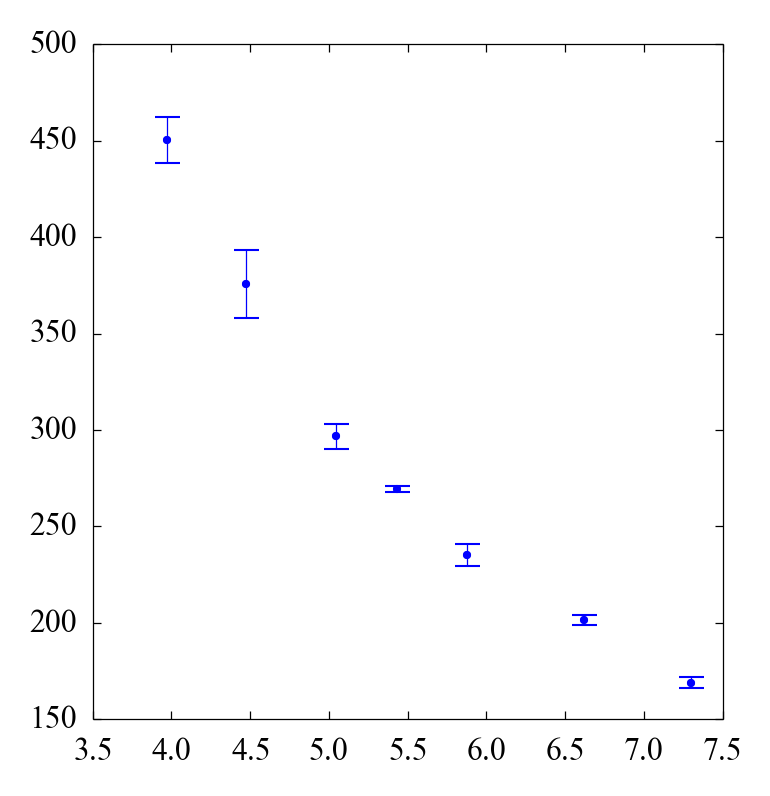

In [19]:
fig, ax = plt.subplots()
ax.errorbar(T_load, tau, yerr=tau_error, fmt='.')

In [20]:
paper_directory = '/Users/daniel/Code/notebook/mkid/McCarrick_2014'
np.save(os.path.join(paper_directory, 'T_load.npy'), T_load)
np.save(os.path.join(paper_directory, 'tau_load.npy'), tau)
np.save(os.path.join(paper_directory, 'tau_load_error.npy'), tau_error)